Problem 0) Critique the most important figure from a seminal paper in your field. Provide
the original figure/caption. In your own words, what story is this figure trying to
convey? What does it do well? What could have been done better? What elements
didn't need to be present to still convey the same story?

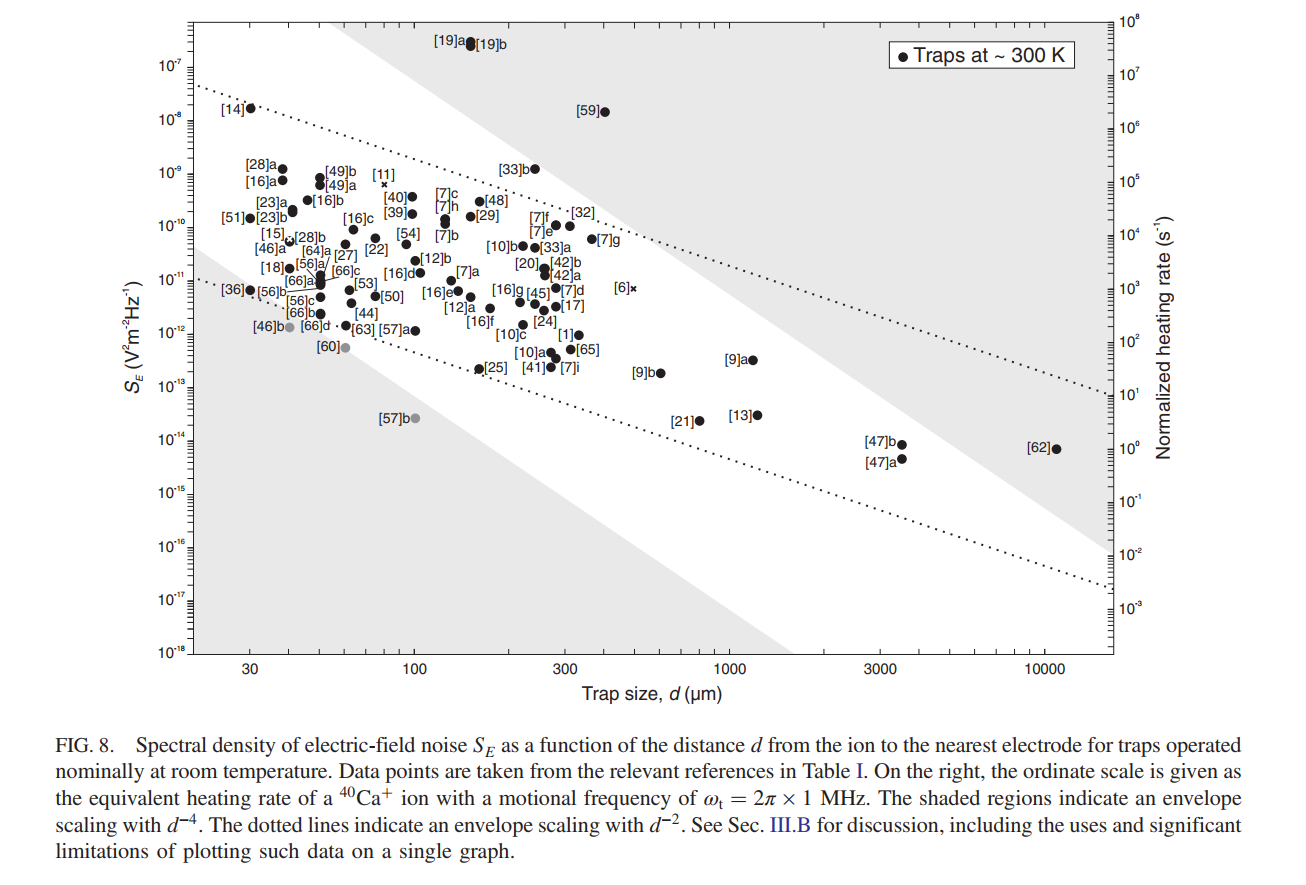

In [116]:
from IPython.display import Image
Image(filename='hw_2_data/heating_rates.png') 

My research is in the field of ion trapping. In general, we trap a few (<10) individual charged particles and use them to study fundamental quantum interactions or model more complicated systems.  One of the largest current applications of ion traps is use as a platform for quantum computing. The idea behind quantum computing is to store information in quantum systems and utilize quantum properties such as superposition and entanglement to run certain computations faster than one could with a purely classical system.  However, when storing information in a quantum system, you need to isolate your system from the environment lest the information escape into it. This is known as decoherence.

One of the primary sources of decoherence in ion traps is something called anamoulous heating. It is dubbed 'anamoulous' because at this point it origins aren't fully known. In order to gain insight into its possible origins, one avenue of research is to study how the amount of decoherence (or heating rates) scales with the size of the ion trap (how close the ion is to the trap surface) because different popular mechanisms have different scalings. However, each ion trap has a size that in enforced by the trap geometry which is very  difficult to change so this is a difficult scaling to measure.

This is where the above plot comes in. In a review paper by Brownnutt et al. [(Rev. Mod. Phys., Vol. 87, No. 4, Oct-Dec 2015)](https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.87.1419), the authors synthesized the results from ion trap experiments over two an a half decades and plotted their heating rates as a function of trap size to try an gain some insight into this scaling. The plot attempts to demonstrate that the two major theories which suggest $d^{-2}$ and $d^{-4}$ scaling respectively are both viable possible. However, at the same time it is difficult to extract a scaling from such a scattered data set (keep in mind each measurement is from a different lab at a different lab with traps likely made under very different conditions) where most of the data only spans one order of magnitude.

I think the plot does a very nice job of plotting the two scalings in an accessible manor with the dotted lines and shaded regions which is the plots main point.  Additionally, the matching of each point to a distinct paper (found in table I) is handy for practical use of this figure. For example, if I want to figure out why 57b heating rate is so low, I could easily find the paper where that was measured and see if I could find something interesting that group did to achieve that rate. 

One critique of this graph as a stand alone plot is that it is too busy. The data in the middle mostly comes out as a blob. There are subsets of this dataset which are taken under more similar conditions that could be more illustrative. However, the authors being aware of this included other plots that do just this. If you look closely at the graph, there are a few special markers such as greyer dots as well as 'x's which are not clearly explained in the figure or captions. 

There are a few redundant elements present in this plot. Fistly, the legend in the upper right hand corner.  The fact that these are only 300K traps is very important, however without showing any 77K traps in this plot it would be more appropriate in the caption. Alternatively you could include 77K traps and differentiate by color. Additionally, there are two y-axis labels. The right is the electric field noise while the left is the same quantity converted into units of normalized heating rate. It seems that inclusion of the units on the left in unnecessary and less intuitive. 

Problem 1) Reproduce one of your old published-paper quality plots with Bokeh. Provide
the original plot, the recreated Bokeh plot, and the Python code used to make the new
plot. Add some (new) dynamic interactions to the plot — does it help tell your story
better? You can ask us for an example from us if you dont have your own plots. 

In [202]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import Range1d

output_notebook()

data = pd.read_csv("hw_2_data/master_df_bloom_figure.csv")
sc_x = data['year'].where(data['type']=='supercomputer')
sc_y = data['gpw'].where(data['type']=='supercomputer')
nvid_x = data['year'].where(data['type']=='NVIDIA GPU')
nvid_y = data['gpw'].where(data['type']=='NVIDIA GPU')

TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"
p = figure(y_axis_type="log",tools=TOOLS, toolbar_location="above",plot_width=600, plot_height=600)
p.scatter(sc_x, sc_y,color = 'green')
p.scatter(nvid_x, nvid_y,color='blue')
p.x_range=Range1d(2006,2016)
p.ray(x=[0], y=[10e5], length=0, angle=0, line_width=1,line_color='black',line_dash='dashed')
show(p)

Loading BokehJS ...

Problem 2) Reproduce in matplotlib the provided plot stocks.png

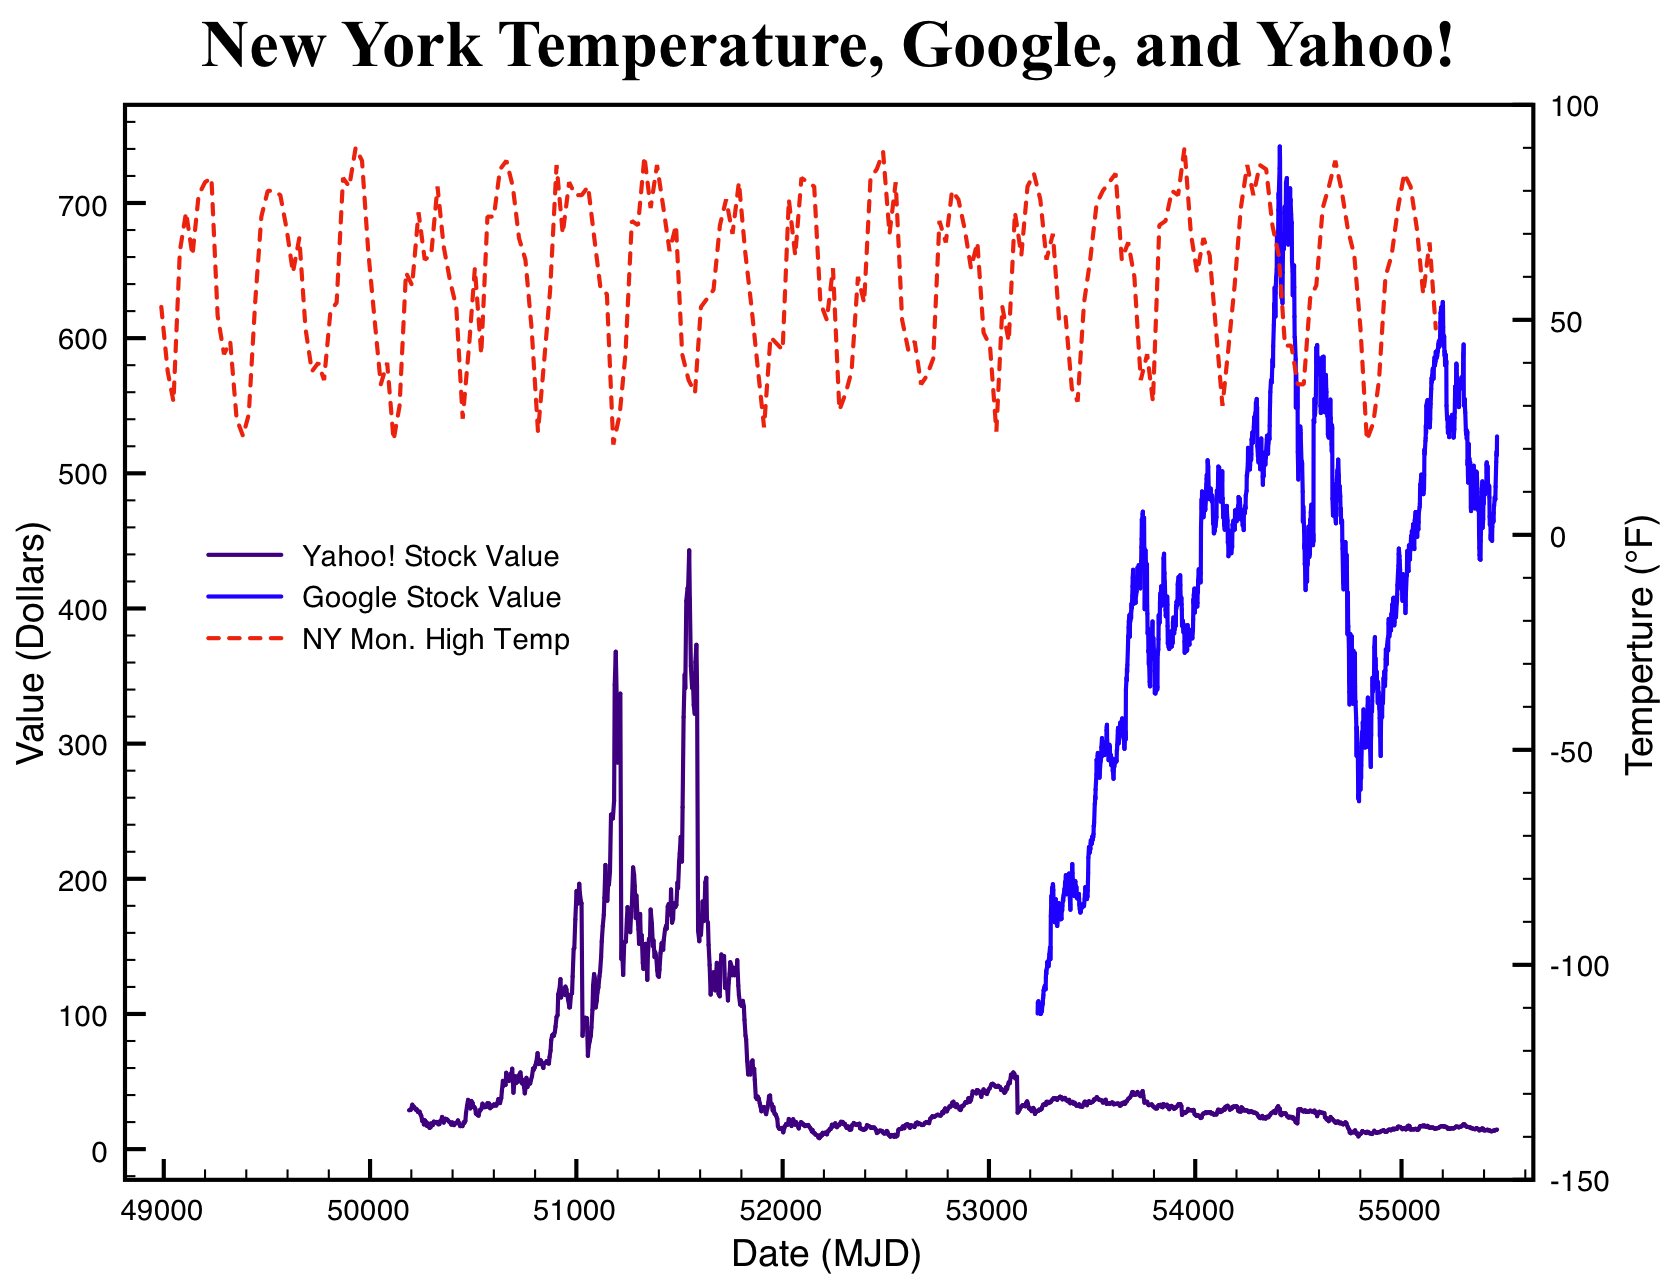

In [113]:
Image(filename="hw_2_data/stocks.png")

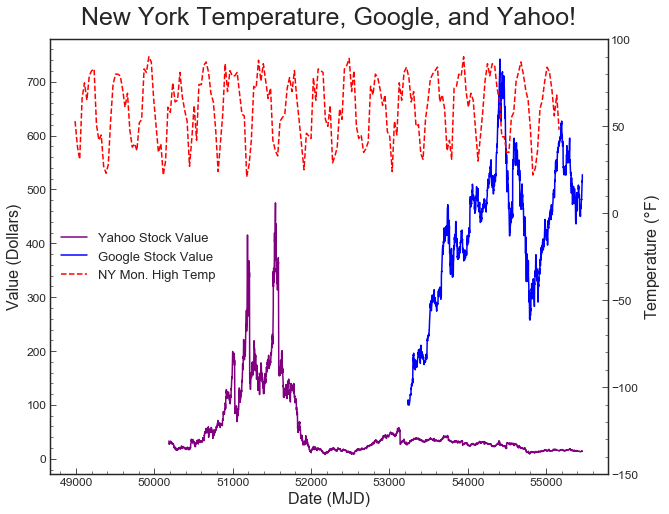

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'xtick.minor.size': "3",'xtick.direction': u'in','ytick.direction': u'in'})

import pandas as pd
import numpy as np

files = ["yahoo_data.txt","google_data.txt","ny_temps.txt"]

lst =[]
for file in files:
    df = pd.read_csv("hw_2_data/"+file,sep = "\t",index_col=0,skiprows=1,names=["MJD",file[:-4]])
    lst.append(df)
data = pd.concat(lst)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(data['yahoo_data'],c='purple',)
ax.plot(data['google_data'],c='blue')
ax.minorticks_on()
ax.set_xlabel("Date (MJD)",fontsize=16)
ax.set_ylabel("Value (Dollars)",fontsize=16)
ax.plot(np.nan,'r--')
ax2 = ax.twinx()
ax2.set_ylabel("Temperature ($\degree$F)",fontsize=16)
ax2.plot(data['ny_temps'],'r--')
ax2.set_ylim((-150,100))
ax2.minorticks_on()
ax.legend(loc=6,fontsize=13,labels=['Yahoo Stock Value','Google Stock Value','NY Mon. High Temp'])
ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.title("New York Temperature, Google, and Yahoo!",fontsize=25,y=1.02)
plt.show()